# Import Necessary libreries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

# Import data

In [2]:
my_movies_data=pd.read_csv("./my_movies.csv")
my_movies_data

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


# Data Understanding

In [3]:
my_movies_data_1=my_movies_data.iloc[:,5:]
my_movies_data_1

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [4]:
my_movies_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


In [5]:
my_movies_data_1.dtypes

Sixth Sense      int64
Gladiator        int64
LOTR1            int64
Harry Potter1    int64
Patriot          int64
LOTR2            int64
Harry Potter2    int64
LOTR             int64
Braveheart       int64
Green Mile       int64
dtype: object

In [6]:
my_movies_data_1.isna().sum()

Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [7]:
my_movies_data_1.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Correlation Matrix and heatmap

In [8]:
corr=my_movies_data_1.corr()
corr

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
Sixth Sense,1.000000,0.356348,-0.102062,-0.102062,0.166667,-0.102062,-0.408248,0.272166,-0.408248,0.408248
Gladiator,0.356348,1.000000,-0.763763,-0.763763,0.801784,-0.763763,-0.509175,0.218218,0.218218,-0.218218
LOTR1,-0.102062,-0.763763,1.000000,0.375000,-0.612372,1.000000,-0.166667,-0.166667,-0.166667,0.375000
Harry Potter1,-0.102062,-0.763763,0.375000,1.000000,-0.612372,0.375000,0.666667,-0.166667,-0.166667,0.375000
Patriot,0.166667,0.801784,-0.612372,-0.612372,1.000000,-0.612372,-0.408248,-0.408248,0.272166,-0.612372
LOTR2,-0.102062,-0.763763,1.000000,0.375000,-0.612372,1.000000,-0.166667,-0.166667,-0.166667,0.375000
Harry Potter2,-0.408248,-0.509175,-0.166667,0.666667,-0.408248,-0.166667,1.000000,-0.111111,-0.111111,-0.166667
LOTR,0.272166,0.218218,-0.166667,-0.166667,-0.408248,-0.166667,-0.111111,1.000000,-0.111111,0.666667
Braveheart,-0.408248,0.218218,-0.166667,-0.166667,0.272166,-0.166667,-0.111111,-0.111111,1.000000,-0.166667
Green Mile,0.408248,-0.218218,0.375000,0.375000,-0.612372,0.375000,-0.166667,0.666667,-0.166667,1.000000


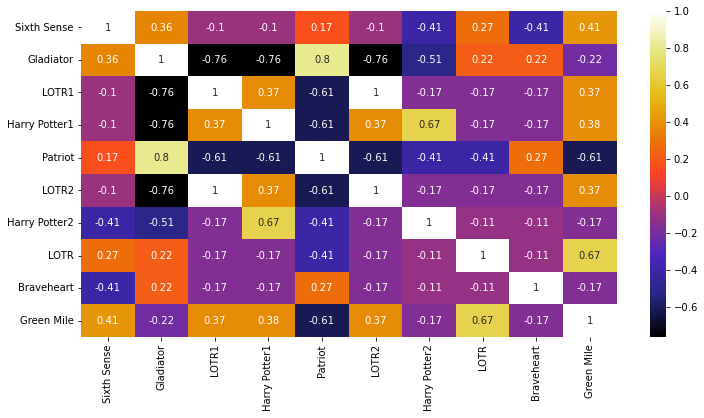

In [9]:
plt.figure(figsize=(12,6))
sns.heatmap(corr,annot=True,cmap="CMRmap")
plt.show()

# Model Building

## 1.  Min_Support=0.02  Metric=Confidence    Min_threshold=0.6

### max_len=3

In [10]:
frequent_iteams_set=apriori(df=my_movies_data_1,min_support=0.02,use_colnames=True,max_len=3)
frequent_iteams_set

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [11]:
rules=association_rules(df=frequent_iteams_set,metric='confidence',min_threshold=0.6,support_only=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
5,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,(LOTR),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
9,(Braveheart),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf


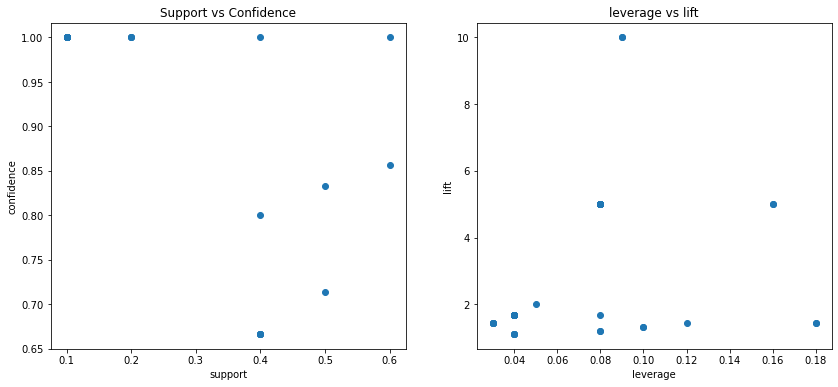

In [12]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(rules['support'], rules['confidence'],cmap="plasma")
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.subplot(1,2,2)
plt.scatter(rules['leverage'], rules['lift'],cmap="plasma")
plt.xlabel('leverage')
plt.ylabel('lift')
plt.title('leverage vs lift')
plt.show()

### max_len=4

In [13]:
frequent_iteams_set=apriori(df=my_movies_data_1,min_support=0.02,use_colnames=True,max_len=4)
frequent_iteams_set

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [14]:
rules=association_rules(df=frequent_iteams_set,metric='confidence',min_threshold=0.6,support_only=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
106,"(Harry Potter1, LOTR1)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
107,"(Harry Potter1, LOTR2)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
108,"(Harry Potter1, Green Mile)","(LOTR1, LOTR2)",0.1,0.2,0.1,1.000000,5.000000,0.08,inf
109,"(LOTR1, Green Mile)","(Harry Potter1, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


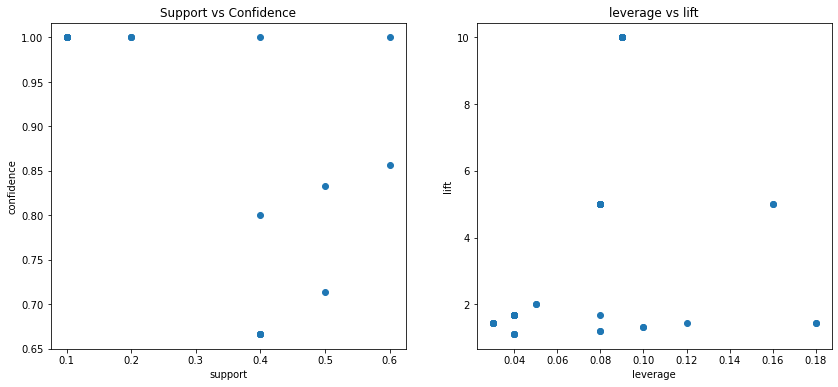

In [15]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(rules['support'], rules['confidence'],cmap="plasma")
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.subplot(1,2,2)
plt.scatter(rules['leverage'], rules['lift'],cmap="plasma")
plt.xlabel('leverage')
plt.ylabel('lift')
plt.title('leverage vs lift')
plt.show()

### max_len=5

In [16]:
frequent_iteams_set=apriori(df=my_movies_data_1,min_support=0.02,use_colnames=True,max_len=5)
frequent_iteams_set

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [17]:
rules=association_rules(df=frequent_iteams_set,metric='confidence',min_threshold=0.6,support_only=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
129,"(LOTR2, Green Mile)","(Harry Potter1, LOTR1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
130,"(LOTR2, Sixth Sense)","(Harry Potter1, LOTR1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
131,"(Harry Potter1, LOTR2)","(LOTR1, Green Mile, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
132,"(Harry Potter1, Green Mile)","(LOTR1, LOTR2, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


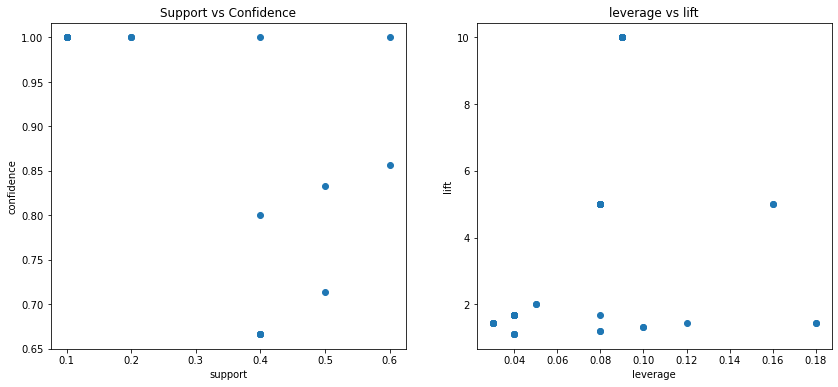

In [18]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(rules['support'], rules['confidence'],cmap="plasma")
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.subplot(1,2,2)
plt.scatter(rules['leverage'], rules['lift'],cmap="plasma")
plt.xlabel('leverage')
plt.ylabel('lift')
plt.title('leverage vs lift')
plt.show()

### max_len=6

In [19]:
frequent_iteams_set=apriori(df=my_movies_data_1,min_support=0.02,use_colnames=True,max_len=6)
frequent_iteams_set

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [20]:
rules=association_rules(df=frequent_iteams_set,metric='confidence',min_threshold=0.6,support_only=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
129,"(LOTR2, Green Mile)","(Harry Potter1, LOTR1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
130,"(LOTR2, Sixth Sense)","(Harry Potter1, LOTR1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
131,"(Harry Potter1, LOTR2)","(LOTR1, Green Mile, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
132,"(Harry Potter1, Green Mile)","(LOTR1, LOTR2, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


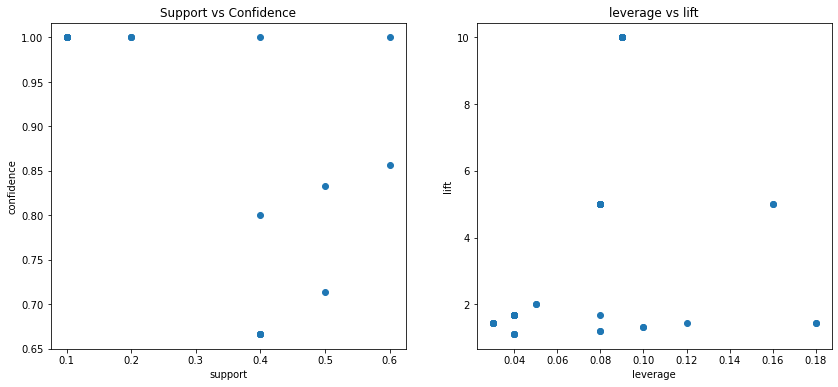

In [21]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(rules['support'], rules['confidence'],cmap="plasma")
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.subplot(1,2,2)
plt.scatter(rules['leverage'], rules['lift'],cmap="plasma")
plt.xlabel('leverage')
plt.ylabel('lift')
plt.title('leverage vs lift')
plt.show()

### max_len=7

In [22]:
frequent_iteams_set=apriori(df=my_movies_data_1,min_support=0.02,use_colnames=True,max_len=7)
frequent_iteams_set

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [23]:
rules=association_rules(df=frequent_iteams_set,metric='confidence',min_threshold=0.6,support_only=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
129,"(LOTR2, Green Mile)","(Harry Potter1, LOTR1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
130,"(LOTR2, Sixth Sense)","(Harry Potter1, LOTR1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
131,"(Harry Potter1, LOTR2)","(LOTR1, Green Mile, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
132,"(Harry Potter1, Green Mile)","(LOTR1, LOTR2, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


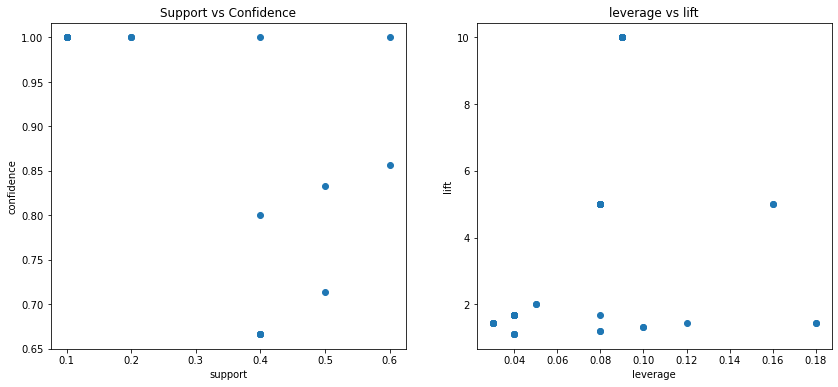

In [24]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(rules['support'], rules['confidence'],cmap="plasma")
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.subplot(1,2,2)
plt.scatter(rules['leverage'], rules['lift'],cmap="plasma")
plt.xlabel('leverage')
plt.ylabel('lift')
plt.title('leverage vs lift')
plt.show()

### Observation:
### if we increase Min support and Confidence lavel there will be less number of frequent iteams sets


###  with this Min Support And Confidence level at best we can get  6 iteams frequent set
### because if we increase the max length result will be same

## 2.  Min_Support=0.04  Metric=Confidence    Min_threshold=0.6

### max_len=3

In [25]:
frequent_iteams_set=apriori(df=my_movies_data_1,min_support=0.04,use_colnames=True,max_len=3)
frequent_iteams_set

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [26]:
rules=association_rules(df=frequent_iteams_set,metric='confidence',min_threshold=0.6,support_only=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
5,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,(LOTR),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
9,(Braveheart),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf


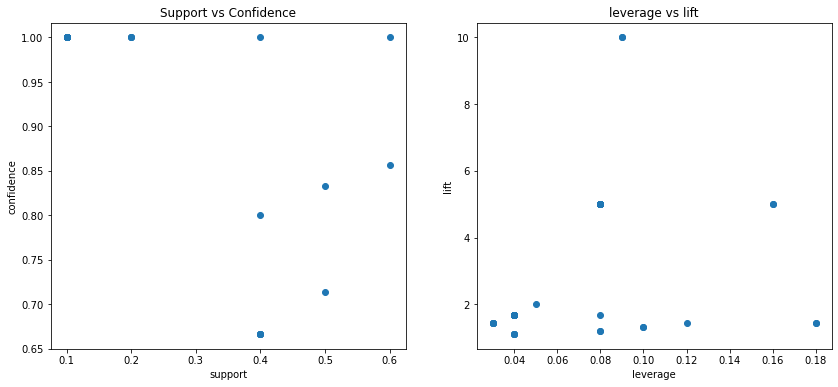

In [27]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(rules['support'], rules['confidence'],cmap="plasma")
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.subplot(1,2,2)
plt.scatter(rules['leverage'], rules['lift'],cmap="plasma")
plt.xlabel('leverage')
plt.ylabel('lift')
plt.title('leverage vs lift')
plt.show()

### max_len=4

In [28]:
frequent_iteams_set=apriori(df=my_movies_data_1,min_support=0.04,use_colnames=True,max_len=4)
frequent_iteams_set

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [29]:
rules=association_rules(df=frequent_iteams_set,metric='confidence',min_threshold=0.6,support_only=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
106,"(Harry Potter1, LOTR1)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
107,"(Harry Potter1, LOTR2)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
108,"(Harry Potter1, Green Mile)","(LOTR1, LOTR2)",0.1,0.2,0.1,1.000000,5.000000,0.08,inf
109,"(LOTR1, Green Mile)","(Harry Potter1, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


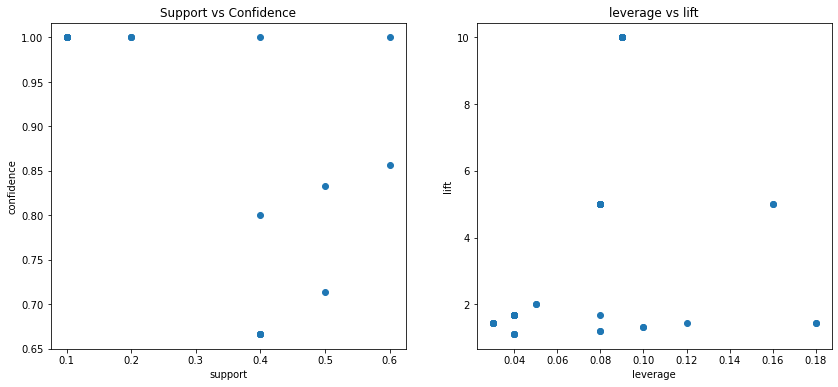

In [30]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(rules['support'], rules['confidence'],cmap="plasma")
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.subplot(1,2,2)
plt.scatter(rules['leverage'], rules['lift'],cmap="plasma")
plt.xlabel('leverage')
plt.ylabel('lift')
plt.title('leverage vs lift')
plt.show()

### max_len=5

In [31]:
frequent_iteams_set=apriori(df=my_movies_data_1,min_support=0.04,use_colnames=True,max_len=5)
frequent_iteams_set

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [32]:
rules=association_rules(df=frequent_iteams_set,metric='confidence',min_threshold=0.6,support_only=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
129,"(LOTR2, Green Mile)","(Harry Potter1, LOTR1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
130,"(LOTR2, Sixth Sense)","(Harry Potter1, LOTR1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
131,"(Harry Potter1, LOTR2)","(LOTR1, Green Mile, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
132,"(Harry Potter1, Green Mile)","(LOTR1, LOTR2, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


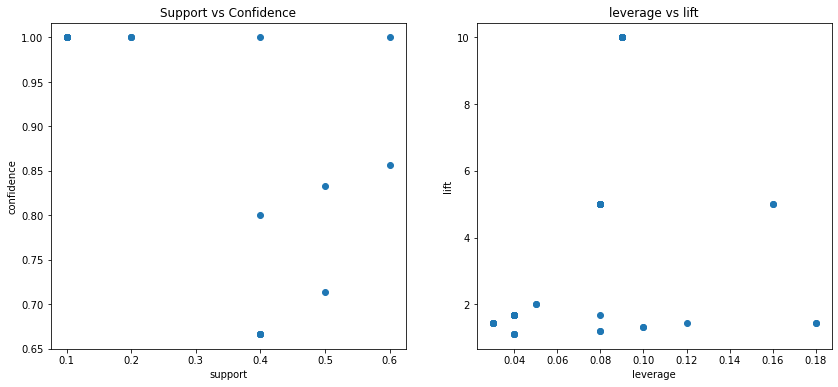

In [33]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(rules['support'], rules['confidence'],cmap="plasma")
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.subplot(1,2,2)
plt.scatter(rules['leverage'], rules['lift'],cmap="plasma")
plt.xlabel('leverage')
plt.ylabel('lift')
plt.title('leverage vs lift')
plt.show()

### max_len=6

In [34]:
frequent_iteams_set=apriori(df=my_movies_data_1,min_support=0.04,use_colnames=True,max_len=6)
frequent_iteams_set

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [35]:
rules=association_rules(df=frequent_iteams_set,metric='confidence',min_threshold=0.6,support_only=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
129,"(LOTR2, Green Mile)","(Harry Potter1, LOTR1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
130,"(LOTR2, Sixth Sense)","(Harry Potter1, LOTR1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
131,"(Harry Potter1, LOTR2)","(LOTR1, Green Mile, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
132,"(Harry Potter1, Green Mile)","(LOTR1, LOTR2, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


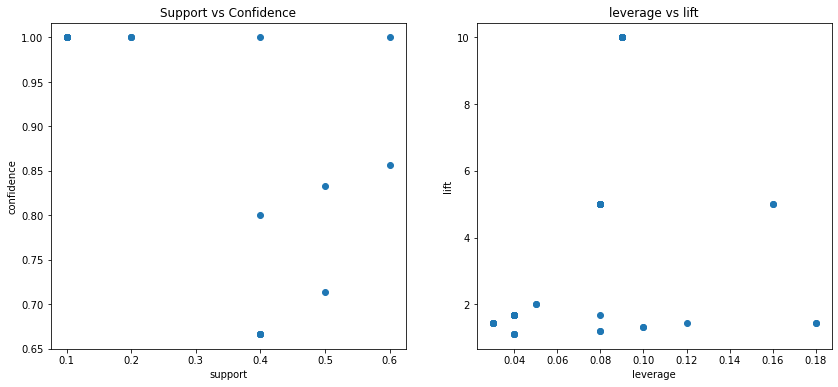

In [36]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(rules['support'], rules['confidence'],cmap="plasma")
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.subplot(1,2,2)
plt.scatter(rules['leverage'], rules['lift'],cmap="plasma")
plt.xlabel('leverage')
plt.ylabel('lift')
plt.title('leverage vs lift')
plt.show()

In [37]:
frequent_iteams_set=apriori(df=my_movies_data_1,min_support=0.04,use_colnames=True,max_len=None)
frequent_iteams_set

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [38]:
rules=association_rules(df=frequent_iteams_set,metric='confidence',min_threshold=0.6,support_only=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
129,"(LOTR2, Green Mile)","(Harry Potter1, LOTR1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
130,"(LOTR2, Sixth Sense)","(Harry Potter1, LOTR1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
131,"(Harry Potter1, LOTR2)","(LOTR1, Green Mile, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
132,"(Harry Potter1, Green Mile)","(LOTR1, LOTR2, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


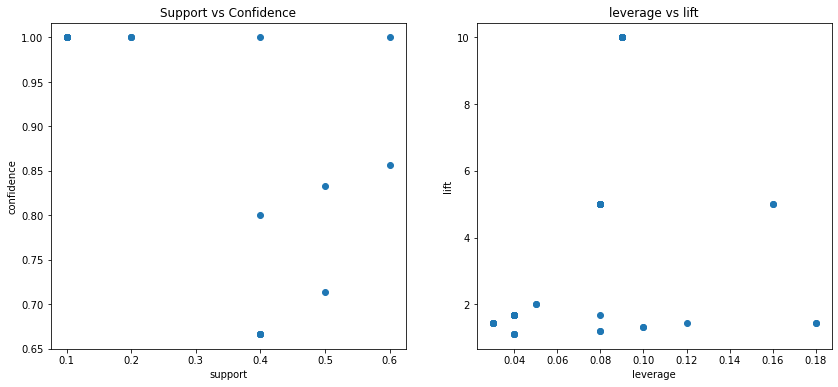

In [39]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(rules['support'], rules['confidence'],cmap="plasma")
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.subplot(1,2,2)
plt.scatter(rules['leverage'], rules['lift'],cmap="plasma")
plt.xlabel('leverage')
plt.ylabel('lift')
plt.title('leverage vs lift')
plt.show()

### Observation:
### if we increase Min support and Confidence lavel there will be less number of frequent iteams sets


###  with this Min Support And Confidence level at best we can get  5 iteams frequent set
### because if we increase the max length result will be same

## 3.  Min_Support=0.06  Metric=Confidence    Min_threshold=0.5

### max_len=3

In [40]:
frequent_iteams_set=apriori(df=my_movies_data_1,min_support=0.06,use_colnames=True,max_len=3)
frequent_iteams_set

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [41]:
rules=association_rules(df=frequent_iteams_set,metric='confidence',min_threshold=0.6,support_only=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
5,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,(LOTR),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
9,(Braveheart),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf


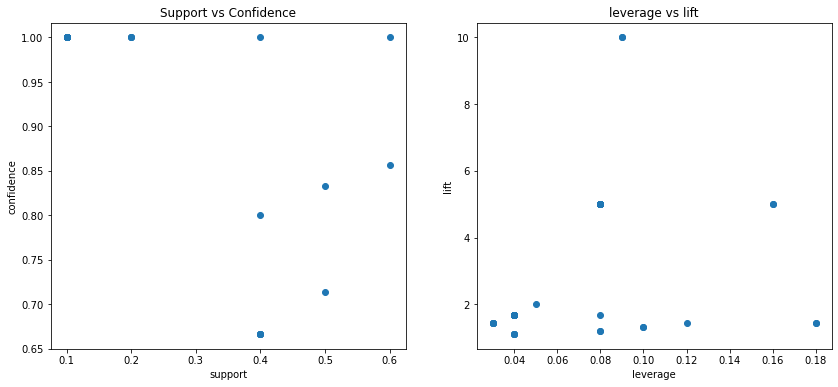

In [42]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(rules['support'], rules['confidence'],cmap="plasma")
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.subplot(1,2,2)
plt.scatter(rules['leverage'], rules['lift'],cmap="plasma")
plt.xlabel('leverage')
plt.ylabel('lift')
plt.title('leverage vs lift')
plt.show()

### max_len=4

In [43]:
frequent_iteams_set=apriori(df=my_movies_data_1,min_support=0.06,use_colnames=True,max_len=4)
frequent_iteams_set

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [44]:
rules=association_rules(df=frequent_iteams_set,metric='confidence',min_threshold=0.6,support_only=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
106,"(Harry Potter1, LOTR1)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
107,"(Harry Potter1, LOTR2)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
108,"(Harry Potter1, Green Mile)","(LOTR1, LOTR2)",0.1,0.2,0.1,1.000000,5.000000,0.08,inf
109,"(LOTR1, Green Mile)","(Harry Potter1, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


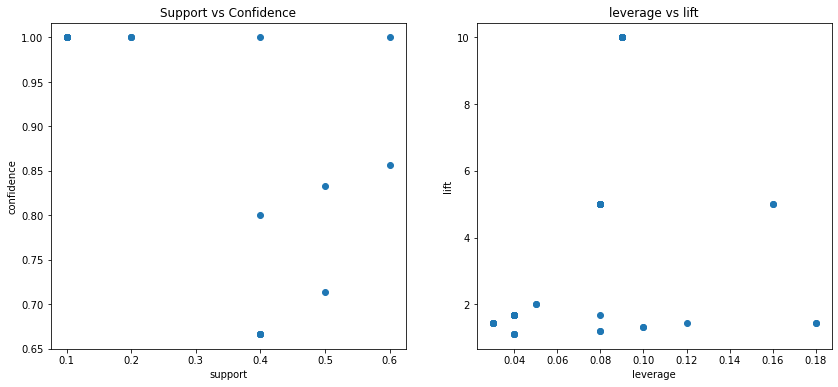

In [45]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(rules['support'], rules['confidence'],cmap="plasma")
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.subplot(1,2,2)
plt.scatter(rules['leverage'], rules['lift'],cmap="plasma")
plt.xlabel('leverage')
plt.ylabel('lift')
plt.title('leverage vs lift')
plt.show()

### max_len=5

In [46]:
frequent_iteams_set=apriori(df=my_movies_data_1,min_support=0.06,use_colnames=True,max_len=5)
frequent_iteams_set

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [47]:
rules=association_rules(df=frequent_iteams_set,metric='confidence',min_threshold=0.6,support_only=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
129,"(LOTR2, Green Mile)","(Harry Potter1, LOTR1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
130,"(LOTR2, Sixth Sense)","(Harry Potter1, LOTR1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
131,"(Harry Potter1, LOTR2)","(LOTR1, Green Mile, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
132,"(Harry Potter1, Green Mile)","(LOTR1, LOTR2, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


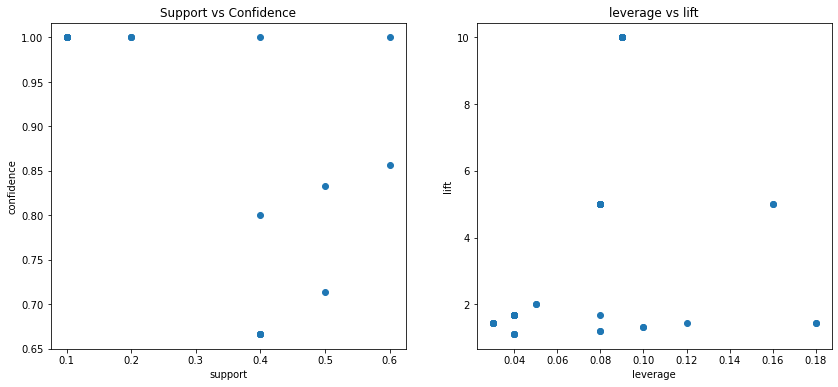

In [48]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(rules['support'], rules['confidence'],cmap="plasma")
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.subplot(1,2,2)
plt.scatter(rules['leverage'], rules['lift'],cmap="plasma")
plt.xlabel('leverage')
plt.ylabel('lift')
plt.title('leverage vs lift')
plt.show()

### max_len=6

In [49]:
frequent_iteams_set=apriori(df=my_movies_data_1,min_support=0.06,use_colnames=True,max_len=6)
frequent_iteams_set

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [50]:
rules=association_rules(df=frequent_iteams_set,metric='confidence',min_threshold=0.6,support_only=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
129,"(LOTR2, Green Mile)","(Harry Potter1, LOTR1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
130,"(LOTR2, Sixth Sense)","(Harry Potter1, LOTR1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
131,"(Harry Potter1, LOTR2)","(LOTR1, Green Mile, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
132,"(Harry Potter1, Green Mile)","(LOTR1, LOTR2, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


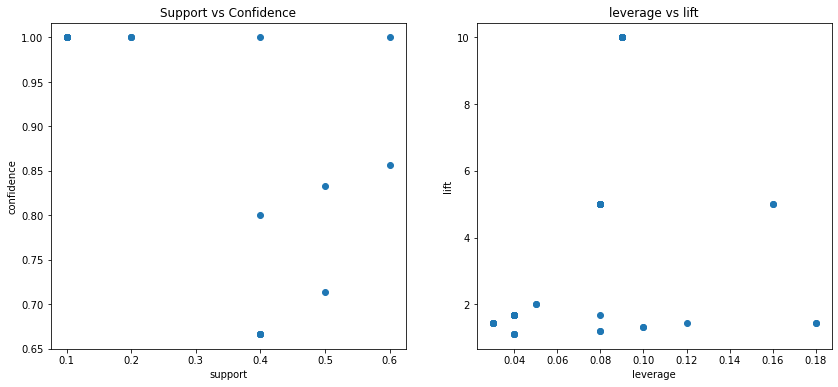

In [51]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(rules['support'], rules['confidence'],cmap="plasma")
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.subplot(1,2,2)
plt.scatter(rules['leverage'], rules['lift'],cmap="plasma")
plt.xlabel('leverage')
plt.ylabel('lift')
plt.title('leverage vs lift')
plt.show()

### Observation:
### if we increase Min support and Confidence lavel there will be less number of frequent iteams sets


###  with this Min Support And Confidence level at best we can get  5 iteams frequent set
### because if we increase the max length result will be same

## 4.  Min_Support=0.08  Metric=Confidence    Min_threshold=0.5

### max_len=3

In [52]:
frequent_iteams_set=apriori(df=my_movies_data_1,min_support=0.08,use_colnames=True,max_len=3)
frequent_iteams_set

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [53]:
rules=association_rules(df=frequent_iteams_set,metric='confidence',min_threshold=0.6,support_only=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
5,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,(LOTR),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
9,(Braveheart),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf


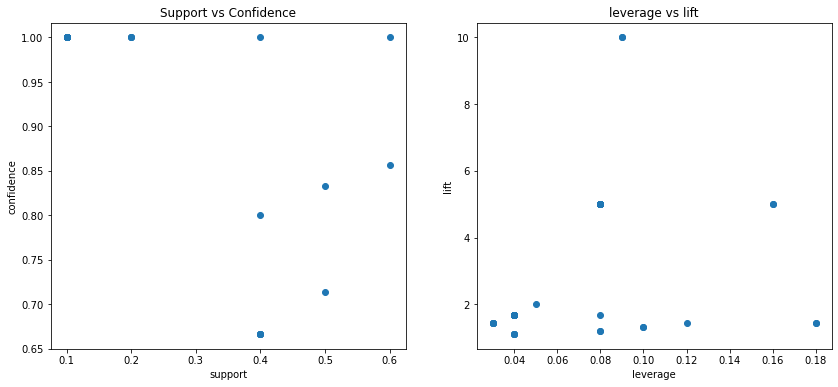

In [54]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(rules['support'], rules['confidence'],cmap="plasma")
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.subplot(1,2,2)
plt.scatter(rules['leverage'], rules['lift'],cmap="plasma")
plt.xlabel('leverage')
plt.ylabel('lift')
plt.title('leverage vs lift')
plt.show()

### max_len=4

In [55]:
frequent_iteams_set=apriori(df=my_movies_data_1,min_support=0.08,use_colnames=True,max_len=4)
frequent_iteams_set

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [56]:
rules=association_rules(df=frequent_iteams_set,metric='confidence',min_threshold=0.6,support_only=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
106,"(Harry Potter1, LOTR1)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
107,"(Harry Potter1, LOTR2)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
108,"(Harry Potter1, Green Mile)","(LOTR1, LOTR2)",0.1,0.2,0.1,1.000000,5.000000,0.08,inf
109,"(LOTR1, Green Mile)","(Harry Potter1, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


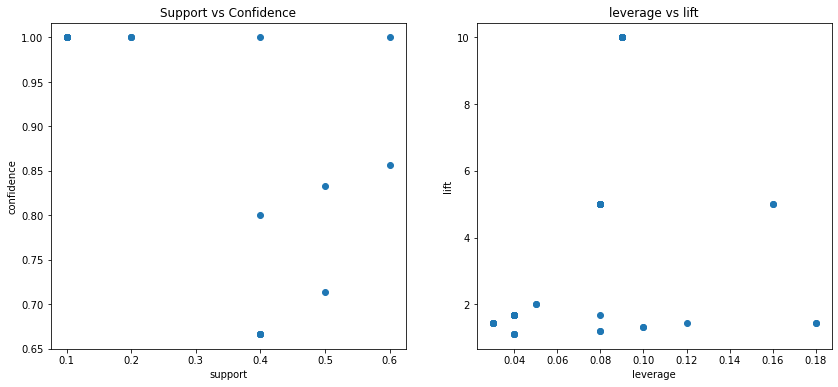

In [57]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(rules['support'], rules['confidence'],cmap="plasma")
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.subplot(1,2,2)
plt.scatter(rules['leverage'], rules['lift'],cmap="plasma")
plt.xlabel('leverage')
plt.ylabel('lift')
plt.title('leverage vs lift')
plt.show()

In [58]:
frequent_iteams_set=apriori(df=my_movies_data_1,min_support=0.08,use_colnames=True,max_len=5)
frequent_iteams_set

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [59]:
rules=association_rules(df=frequent_iteams_set,metric='confidence',min_threshold=0.6,support_only=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
129,"(LOTR2, Green Mile)","(Harry Potter1, LOTR1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
130,"(LOTR2, Sixth Sense)","(Harry Potter1, LOTR1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
131,"(Harry Potter1, LOTR2)","(LOTR1, Green Mile, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
132,"(Harry Potter1, Green Mile)","(LOTR1, LOTR2, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


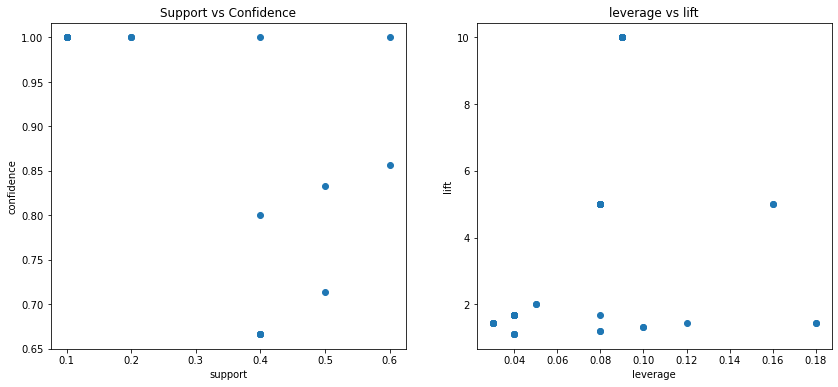

In [60]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(rules['support'], rules['confidence'],cmap="plasma")
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.subplot(1,2,2)
plt.scatter(rules['leverage'], rules['lift'],cmap="plasma")
plt.xlabel('leverage')
plt.ylabel('lift')
plt.title('leverage vs lift')
plt.show()

In [61]:
frequent_iteams_set=apriori(df=my_movies_data_1,min_support=0.08,use_colnames=True,max_len=6)
frequent_iteams_set

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [62]:
rules=association_rules(df=frequent_iteams_set,metric='confidence',min_threshold=0.6,support_only=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
129,"(LOTR2, Green Mile)","(Harry Potter1, LOTR1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
130,"(LOTR2, Sixth Sense)","(Harry Potter1, LOTR1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
131,"(Harry Potter1, LOTR2)","(LOTR1, Green Mile, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
132,"(Harry Potter1, Green Mile)","(LOTR1, LOTR2, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


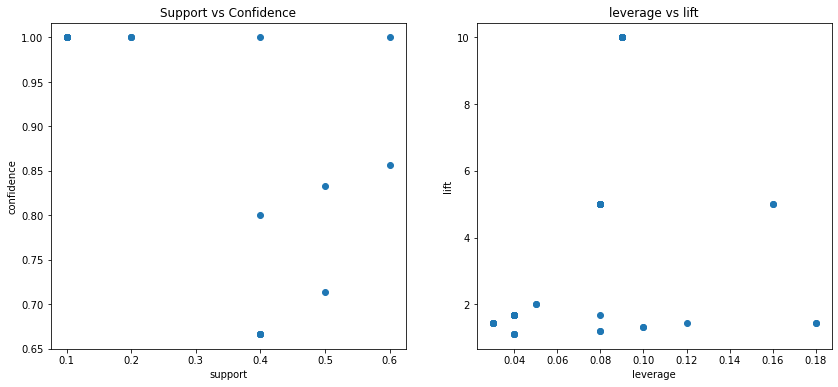

In [63]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(rules['support'], rules['confidence'],cmap="plasma")
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.subplot(1,2,2)
plt.scatter(rules['leverage'], rules['lift'],cmap="plasma")
plt.xlabel('leverage')
plt.ylabel('lift')
plt.title('leverage vs lift')
plt.show()

### Observation:
### if we increase Min support and Confidence lavel there will be less number of frequent iteams sets


###  with this Min Support And Confidence level at best we can get  5 iteams frequent set
### because if we increase the max length result will be same

## 5.  Min_Support=0.1  Metric=Confidence    Min_threshold=0.5

In [64]:
frequent_iteams_set=apriori(df=my_movies_data_1,min_support=0.1,use_colnames=True,max_len=None)
frequent_iteams_set

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [65]:
rules=association_rules(df=frequent_iteams_set,metric='confidence',min_threshold=0.5,support_only=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
4,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
211,"(Harry Potter1, Sixth Sense)","(LOTR1, LOTR2, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
212,(LOTR1),"(Harry Potter1, LOTR2, Green Mile, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
213,(LOTR2),"(Harry Potter1, LOTR1, Green Mile, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
214,(Green Mile),"(Harry Potter1, LOTR1, LOTR2, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


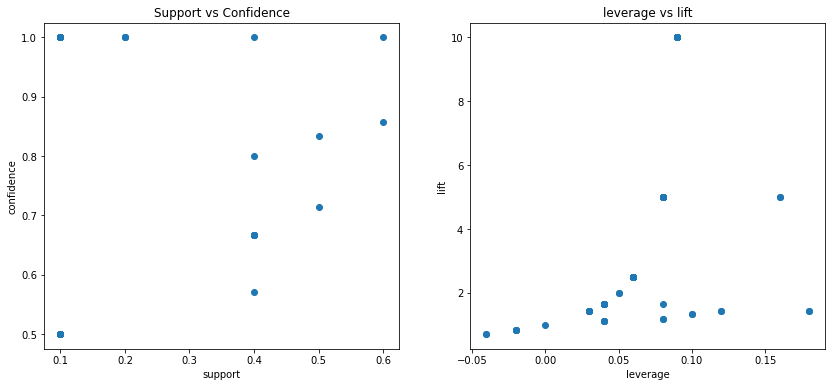

In [66]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(rules['support'], rules['confidence'],cmap="plasma")
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.subplot(1,2,2)
plt.scatter(rules['leverage'], rules['lift'],cmap="plasma")
plt.xlabel('leverage')
plt.ylabel('lift')
plt.title('leverage vs lift')
plt.show()

In [67]:
frequent_iteams_set=apriori(df=my_movies_data_1,min_support=0.1,use_colnames=True,max_len=3)
frequent_iteams_set

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [68]:
rules=association_rules(df=frequent_iteams_set,metric='confidence',min_threshold=0.5,support_only=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
4,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
105,"(Harry Potter1, Green Mile)",(LOTR2),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
106,"(LOTR2, Green Mile)",(Harry Potter1),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
107,(Harry Potter1),"(LOTR2, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
108,(LOTR2),"(Harry Potter1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


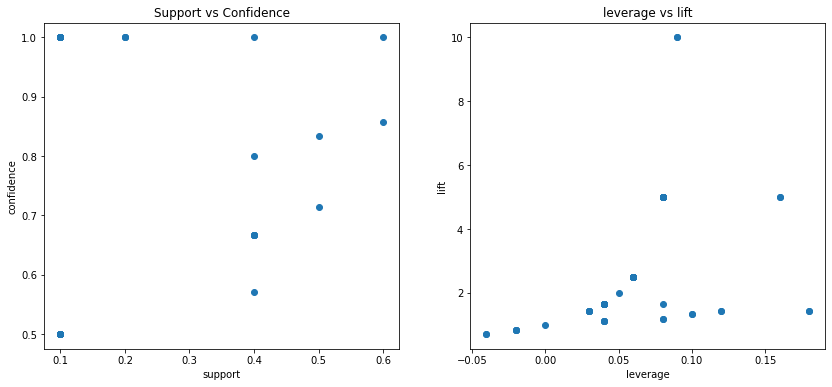

In [69]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(rules['support'], rules['confidence'],cmap="plasma")
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.subplot(1,2,2)
plt.scatter(rules['leverage'], rules['lift'],cmap="plasma")
plt.xlabel('leverage')
plt.ylabel('lift')
plt.title('leverage vs lift')
plt.show()

In [70]:
frequent_iteams_set=apriori(df=my_movies_data_1,min_support=0.1,use_colnames=True,max_len=5)
frequent_iteams_set

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [71]:
rules=association_rules(df=frequent_iteams_set,metric='confidence',min_threshold=0.5,support_only=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
4,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
211,"(Harry Potter1, Sixth Sense)","(LOTR1, LOTR2, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
212,(LOTR1),"(Harry Potter1, LOTR2, Green Mile, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
213,(LOTR2),"(Harry Potter1, LOTR1, Green Mile, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
214,(Green Mile),"(Harry Potter1, LOTR1, LOTR2, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


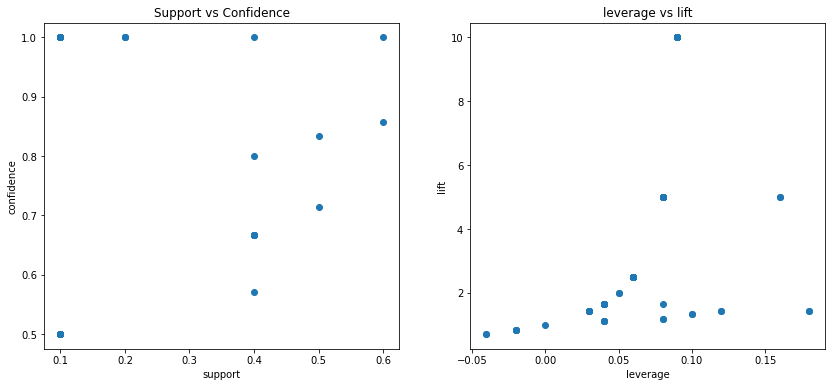

In [72]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(rules['support'], rules['confidence'],cmap="plasma")
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.subplot(1,2,2)
plt.scatter(rules['leverage'], rules['lift'],cmap="plasma")
plt.xlabel('leverage')
plt.ylabel('lift')
plt.title('leverage vs lift')
plt.show()

In [73]:
frequent_iteams_set=apriori(df=my_movies_data_1,min_support=0.1,use_colnames=True,max_len=6
                           )
frequent_iteams_set

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [74]:
rules=association_rules(df=frequent_iteams_set,metric='confidence',min_threshold=0.5,support_only=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
4,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
211,"(Harry Potter1, Sixth Sense)","(LOTR1, LOTR2, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
212,(LOTR1),"(Harry Potter1, LOTR2, Green Mile, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
213,(LOTR2),"(Harry Potter1, LOTR1, Green Mile, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
214,(Green Mile),"(Harry Potter1, LOTR1, LOTR2, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


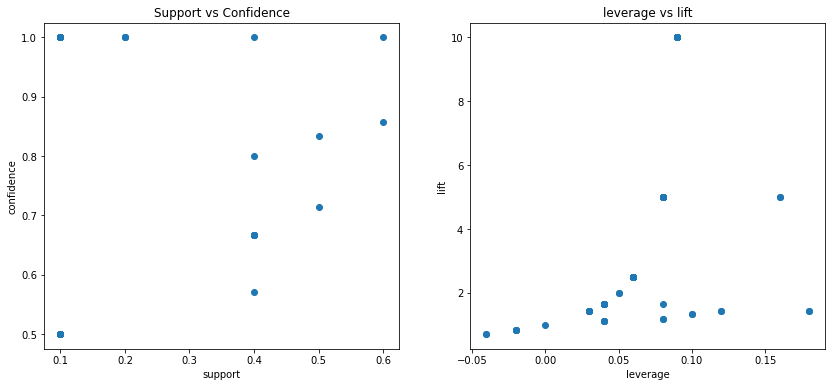

In [75]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(rules['support'], rules['confidence'],cmap="plasma")
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.subplot(1,2,2)
plt.scatter(rules['leverage'], rules['lift'],cmap="plasma")
plt.xlabel('leverage')
plt.ylabel('lift')
plt.title('leverage vs lift')
plt.show()

In [76]:
frequent_iteams_set=apriori(df=my_movies_data_1,min_support=0.1,use_colnames=True,max_len=7)
frequent_iteams_set

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [77]:
rules=association_rules(df=frequent_iteams_set,metric='confidence',min_threshold=0.5,support_only=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
4,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
211,"(Harry Potter1, Sixth Sense)","(LOTR1, LOTR2, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
212,(LOTR1),"(Harry Potter1, LOTR2, Green Mile, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
213,(LOTR2),"(Harry Potter1, LOTR1, Green Mile, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
214,(Green Mile),"(Harry Potter1, LOTR1, LOTR2, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


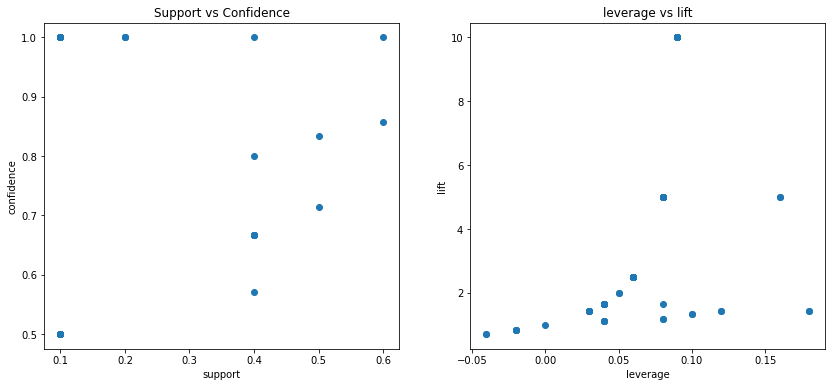

In [78]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(rules['support'], rules['confidence'],cmap="plasma")
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.subplot(1,2,2)
plt.scatter(rules['leverage'], rules['lift'],cmap="plasma")
plt.xlabel('leverage')
plt.ylabel('lift')
plt.title('leverage vs lift')
plt.show()

### Observation:
### if we increase Min support and Confidence lavel there will be less number of frequent iteams sets


###  with this Min Support And Confidence level at best we can get  at max 5  iteams frequent set
### because if we increase the max length result will be same

## 6.  Min_Support=0.2  Metric=Confidence    Min_threshold=0.5

In [79]:
frequent_iteams_set=apriori(df=my_movies_data_1,min_support=0.2,use_colnames=True,max_len=3)
frequent_iteams_set

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Gladiator, Sixth Sense)"
8,0.4,"(Patriot, Sixth Sense)"
9,0.2,"(Green Mile, Sixth Sense)"


In [80]:
rules=association_rules(df=frequent_iteams_set,metric='confidence',min_threshold=0.5,support_only=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


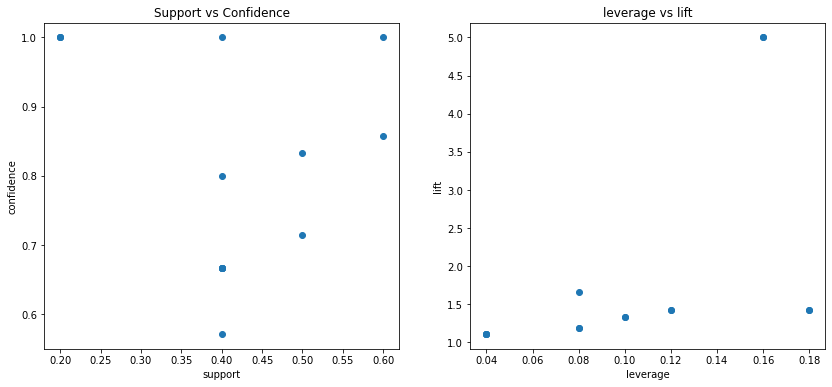

In [81]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(rules['support'], rules['confidence'],cmap="plasma")
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.subplot(1,2,2)
plt.scatter(rules['leverage'], rules['lift'],cmap="plasma")
plt.xlabel('leverage')
plt.ylabel('lift')
plt.title('leverage vs lift')
plt.show()

In [82]:
frequent_iteams_set=apriori(df=my_movies_data_1,min_support=0.2,use_colnames=True,max_len=5)
frequent_iteams_set

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Gladiator, Sixth Sense)"
8,0.4,"(Patriot, Sixth Sense)"
9,0.2,"(Green Mile, Sixth Sense)"


In [83]:
rules=association_rules(df=frequent_iteams_set,metric='confidence',min_threshold=0.5,support_only=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


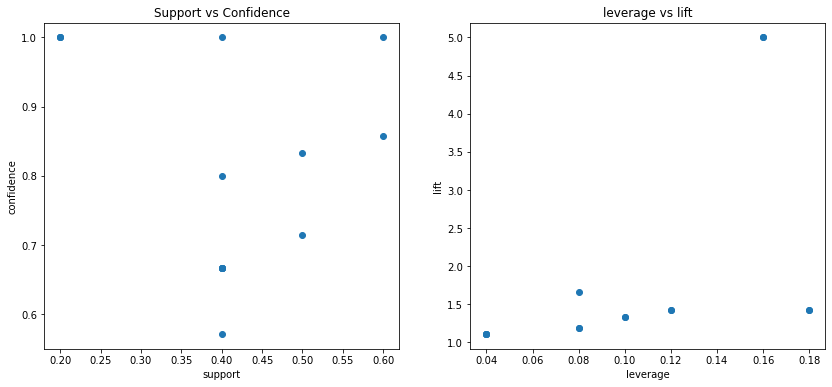

In [84]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(rules['support'], rules['confidence'],cmap="plasma")
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.subplot(1,2,2)
plt.scatter(rules['leverage'], rules['lift'],cmap="plasma")
plt.xlabel('leverage')
plt.ylabel('lift')
plt.title('leverage vs lift')
plt.show()

In [85]:
frequent_iteams_set=apriori(df=my_movies_data_1,min_support=0.2,use_colnames=True,max_len=7)
frequent_iteams_set

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Gladiator, Sixth Sense)"
8,0.4,"(Patriot, Sixth Sense)"
9,0.2,"(Green Mile, Sixth Sense)"


In [86]:
rules=association_rules(df=frequent_iteams_set,metric='confidence',min_threshold=0.5,support_only=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


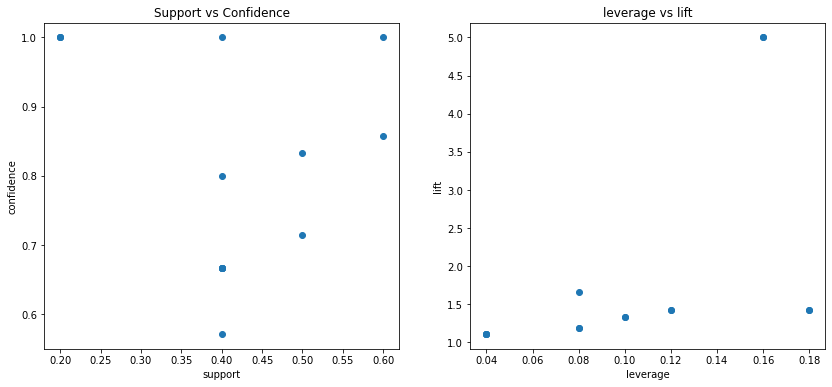

In [87]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(rules['support'], rules['confidence'],cmap="plasma")
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.subplot(1,2,2)
plt.scatter(rules['leverage'], rules['lift'],cmap="plasma")
plt.xlabel('leverage')
plt.ylabel('lift')
plt.title('leverage vs lift')
plt.show()

In [88]:
frequent_iteams_set=apriori(df=my_movies_data_1,min_support=0.2,use_colnames=True,max_len=None)
frequent_iteams_set

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Gladiator, Sixth Sense)"
8,0.4,"(Patriot, Sixth Sense)"
9,0.2,"(Green Mile, Sixth Sense)"


In [89]:
rules=association_rules(df=frequent_iteams_set,metric='confidence',min_threshold=0.5,support_only=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


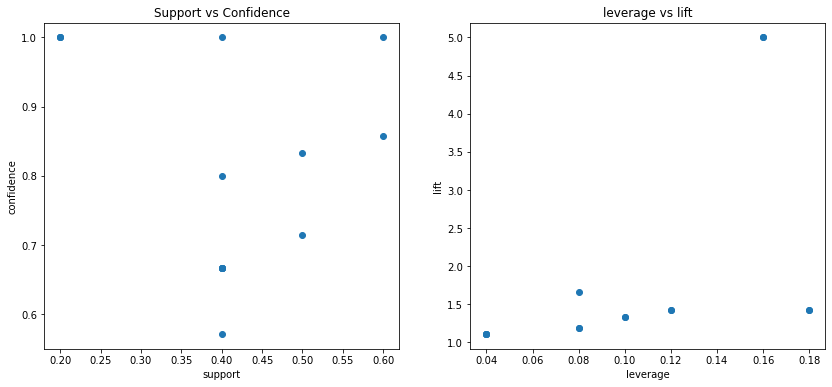

In [90]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(rules['support'], rules['confidence'],cmap="plasma")
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.subplot(1,2,2)
plt.scatter(rules['leverage'], rules['lift'],cmap="plasma")
plt.xlabel('leverage')
plt.ylabel('lift')
plt.title('leverage vs lift')
plt.show()

### Observation:
### if we increase Min support and Confidence lavel there will be less number of frequent iteams sets


###  with this Min Support And Confidence level at best we can get  frequent  iteams set when max length is 3
### because if we increase the max length result will be same